# Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('car_train-data.csv') 

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [6]:
df2 = df.drop(['Unnamed: 0','Seats'],axis='columns')
df2.shape

(6019, 12)

In [7]:
df2.isnull().sum() 

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
New_Price            5195
Price                   0
dtype: int64

In [8]:
df2['Current Year']=2020
df2['no_year']=df2['Current Year']- df2['Year']

In [9]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price,Price,Current Year,no_year
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,NaN,1.75,2020,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,NaN,12.50,2020,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh,4.50,2020,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,NaN,6.00,2020,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,NaN,17.74,2020,7


In [10]:
df2.drop(['Year','Current Year'],axis=1,inplace=True)

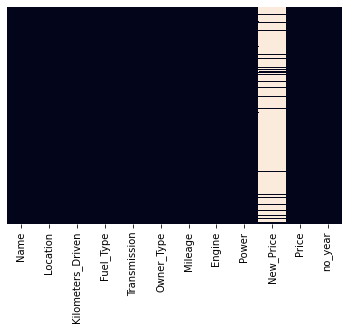

In [11]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False)

In [12]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   New_Price          824 non-null    object 
 10  Price              6019 non-null   float64
 11  no_year            6019 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 564.4+ KB


In [13]:
df3=df2.copy()       

In [14]:
df3.drop(['New_Price'],axis=1,inplace=True)

In [15]:
df3['Engine']=df3['Engine'].str.replace('CC','',regex=True)
df3['Power'] = df3['Power'].str.replace('bhp', '')

In [16]:
df3['Mileage'] = df3['Mileage'].str.replace('kmpl', '')
df3['Mileage'] = df3['Mileage'].str.replace('km/kg', '')


In [17]:
#Converting to numerical type
##df3['Engine']=pd.to_numeric(df3.Engine,errors='coerce',downcast='integer')
df3['Mileage'] = pd.to_numeric(df3['Mileage'].astype(str).str[:-1], errors='coerce')
df3['Engine'] = pd.to_numeric(df3['Engine'].astype(str).str[:-1], errors='coerce')
df3['Power'] = pd.to_numeric(df3['Power'].astype(str).str[:-1], errors='coerce')

In [ ]:
# df3.Engine.astype(int) //only testing 

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Price              6019 non-null   float64
 10  no_year            6019 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 517.4+ KB


In [19]:
#Treating null values
df3['Mileage'].fillna((df3['Mileage'].median()), inplace=True)
df3['Engine'].fillna((df3['Engine'].median()), inplace=True)
df3['Power'].fillna((df3['Power'].median()), inplace=True)
 

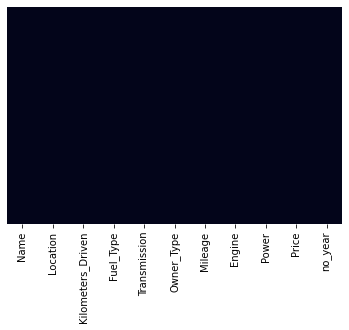

In [20]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False)

In [21]:
df3.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price,no_year
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,18.134966,1620.509221,112.883539,9.479468,6.641801
std,9.126884e+04,4.581528,599.635458,53.283701,11.187917,3.269742
min,1.710000e+02,0.000000,72.000000,34.200000,0.440000,1.000000
25%,3.400000e+04,15.170000,1198.000000,78.000000,3.500000,4.000000
50%,5.300000e+04,18.150000,1493.000000,97.700000,5.640000,6.000000
75%,7.300000e+04,21.100000,1969.000000,138.030000,9.950000,9.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,160.000000,22.000000


## Outliers Detection

# Categorical Values = [Name','Location','Fuel_Type','Transmission','Owner_Type']

# Numerical Values=[kilometers Driven,Mileage,Engine,Power,Price,Years]

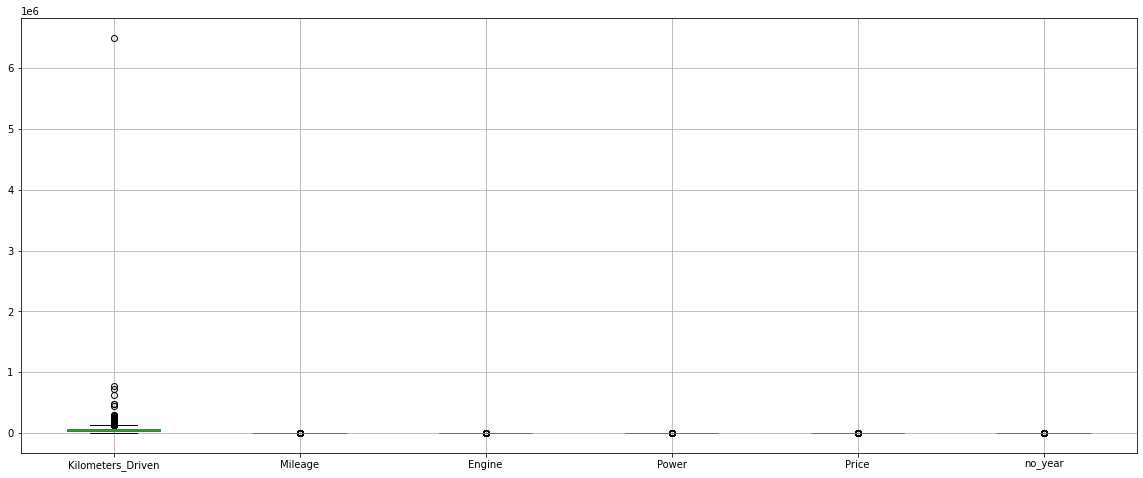

In [22]:
df3.boxplot(figsize=(20,8))

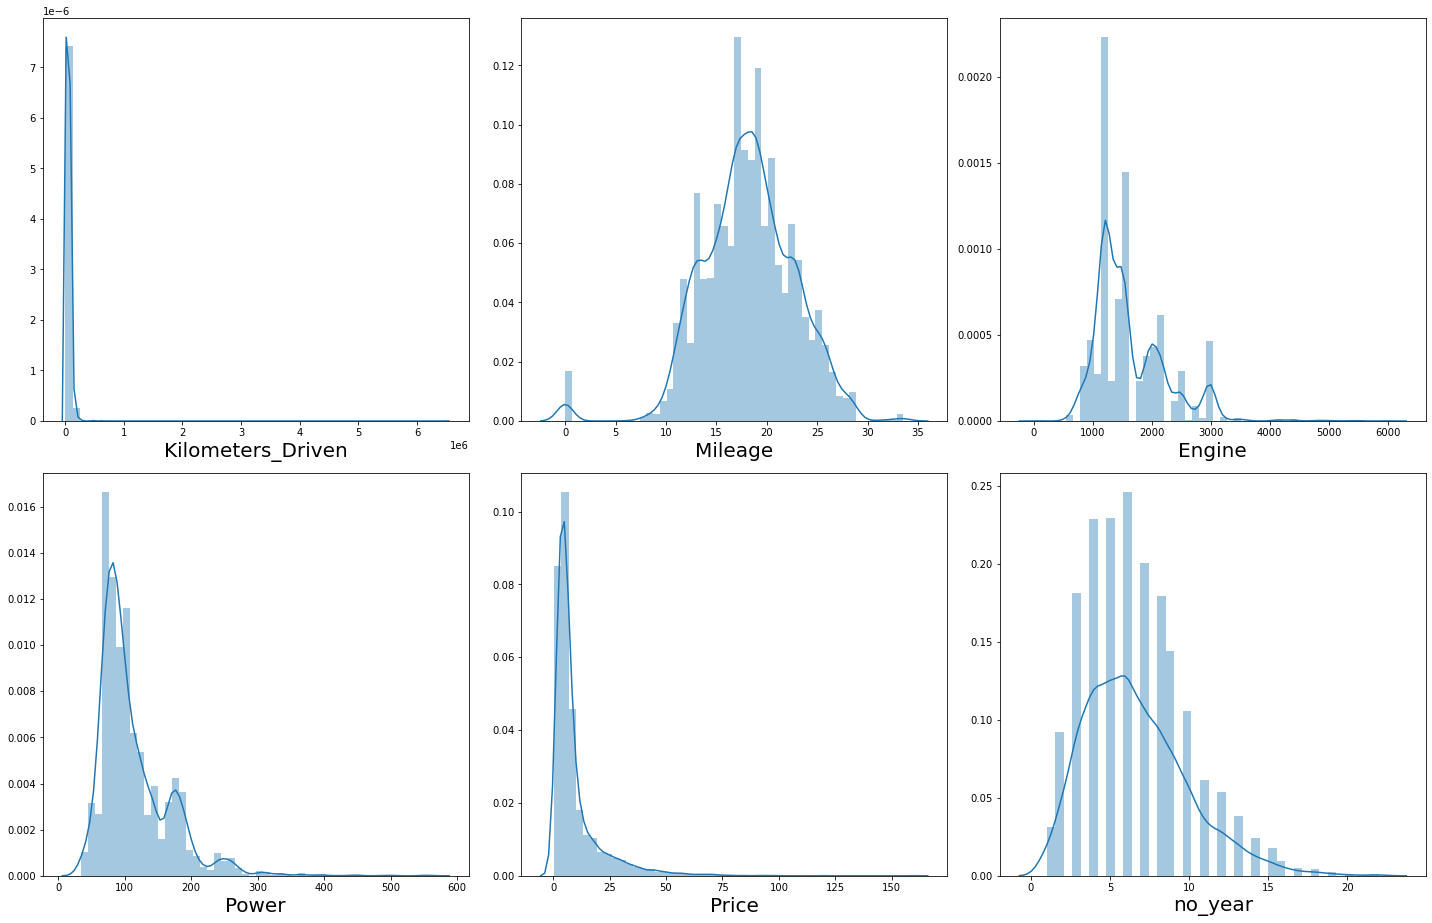

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df3.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df3[column])
    plt.xlabel(column,fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

# Detect outliers using IQR

In [24]:
Q1 = df3.Kilometers_Driven.quantile(0.25)
Q3 = df3.Kilometers_Driven.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-24500.0, 131500.0)

In [25]:
df3[(df3.Kilometers_Driven<lower_limit)|(df3.Kilometers_Driven>upper_limit)]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,4.00,13
64,Tata Indica V2 eLS,Chennai,178000,Diesel,Manual,First,25.0,1396.0,69.00,2.50,4
77,Toyota Innova 2.0 G1,Chennai,230000,Petrol,Manual,Third,12.4,1998.0,132.00,4.50,14
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,136997,Diesel,Automatic,First,17.2,1968.0,138.10,8.50,8
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,147898,Diesel,Manual,First,22.7,1498.0,89.84,4.42,6
...,...,...,...,...,...,...,...,...,...,...,...
5852,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,192000,Diesel,Manual,First,12.8,2494.0,102.00,6.85,12
5871,Ford Endeavour 4x2 XLT Limited Edition,Pune,180000,Diesel,Manual,First,10.9,2499.0,143.00,7.50,11
5914,Skoda Octavia Elegance 1.9 TDI,Hyderabad,132000,Diesel,Manual,First,18.7,1896.0,66.00,2.25,17
5953,Ford Figo Diesel EXI,Jaipur,140000,Diesel,Manual,First,20.0,1399.0,68.00,2.51,8


In [26]:
df4 = df3[(df3.Kilometers_Driven>lower_limit)&(df3.Kilometers_Driven<upper_limit)]
df4

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,7
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.40,1248.0,74.00,4.75,6
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.40,1120.0,71.00,4.00,5
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.00,2498.0,112.00,2.90,8
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.90,998.0,67.10,2.65,7


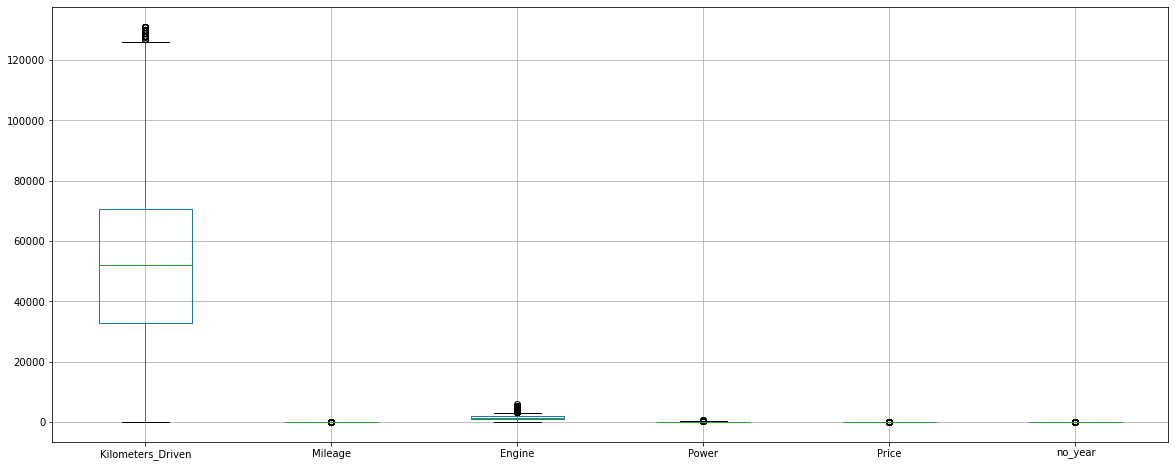

In [27]:
df4.boxplot(figsize=(20,8))

In [28]:
Q1 = df4.Mileage.quantile(0.25)
Q3 = df4.Mileage.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(6.6, 29.800000000000004)

In [29]:
df4[(df4.Mileage<lower_limit)|(df4.Mileage>upper_limit)]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
14,Land Rover Freelander 2 TD4 SE,Pune,85000,Diesel,Automatic,Second,0.00,2179.0,115.0,17.50,8
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,15369,Diesel,Automatic,First,0.00,1950.0,194.0,35.67,1
79,Hyundai Santro Xing XL,Hyderabad,87591,Petrol,Manual,First,0.00,1086.0,97.7,1.30,15
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,0.00,1493.0,97.7,2.95,13
229,Ford Figo Diesel,Bangalore,70436,Diesel,Manual,First,0.00,1498.0,99.0,3.60,5
...,...,...,...,...,...,...,...,...,...,...,...
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,4000,Diesel,Automatic,First,0.00,1950.0,194.0,35.00,1
5935,Maruti Alto K10 LXI CNG,Pune,59525,CNG,Manual,Second,32.26,998.0,58.2,3.10,5
5943,Mahindra Jeep MM 540 DP,Chennai,75000,Diesel,Manual,First,0.00,2112.0,97.7,1.70,18
5972,Hyundai Santro Xing GL,Mumbai,65000,Petrol,Manual,Second,0.00,1086.0,62.0,1.39,12


In [30]:
df5= df4[(df4.Mileage>lower_limit)&(df4.Mileage<upper_limit)]
df5

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,7
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.40,1248.0,74.00,4.75,6
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.40,1120.0,71.00,4.00,5
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.00,2498.0,112.00,2.90,8
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.90,998.0,67.10,2.65,7


In [31]:

print('Before removing unwanted columns: {}'.format(df3.shape))
print('***********')
print('After removing unwanted columns: {}'.format(df4.shape))
print('***********')
print('After removing unwanted columns: {}'.format(df5.shape))

Before removing unwanted columns: (6019, 11)
***********
After removing unwanted columns: (5817, 11)
***********
After removing unwanted columns: (5739, 11)


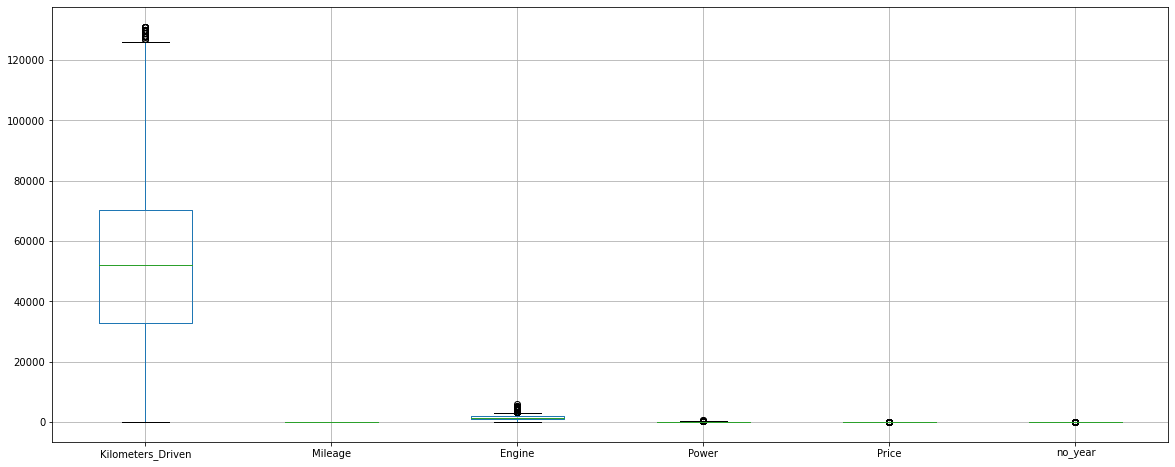

In [32]:
df5.boxplot(figsize=(20,8))

In [33]:
df6=df5.copy()


In [34]:
Q1 = df6.Engine.quantile(0.25)
Q3 = df6.Engine.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(43.0, 3123.0)

In [35]:
df6[(df6.Engine<lower_limit)|(df6.Engine>upper_limit)]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,73000,Petrol,Automatic,First,8.50,4806.0,500.00,14.50,12
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,35277,Petrol,Automatic,First,7.81,5461.0,362.90,30.00,10
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,51002,Diesel,Automatic,First,11.33,4134.0,335.20,48.91,4
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,79926,Diesel,Automatic,First,11.33,4134.0,335.20,29.77,6
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,47088,Petrol,Automatic,Second,10.13,3498.0,364.90,19.00,14
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,22732,Petrol,Automatic,First,18.10,3498.0,306.00,55.54,4
703,Ford Endeavour 3.2 Trend AT 4X4,Coimbatore,50484,Diesel,Automatic,First,10.91,3198.0,197.20,31.12,3
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,10000,Petrol,Automatic,First,18.10,3498.0,306.00,55.00,5
806,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,59636,Diesel,Automatic,First,10.91,3198.0,197.00,29.20,3
926,Porsche Cayman 2009-2012 S,Hyderabad,10000,Petrol,Manual,First,9.00,3436.0,97.70,40.00,10


In [36]:
df7= df6[(df6.Engine>lower_limit)&(df6.Engine<upper_limit)]
df7

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,7
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.40,1248.0,74.00,4.75,6
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.40,1120.0,71.00,4.00,5
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.00,2498.0,112.00,2.90,8
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.90,998.0,67.10,2.65,7


In [37]:
print('Before removing unwanted columns: {}'.format(df5.shape))
print('***********')
print('After removing unwanted columns: {}'.format(df7.shape))
 

Before removing unwanted columns: (5739, 11)
***********
After removing unwanted columns: (5682, 11)


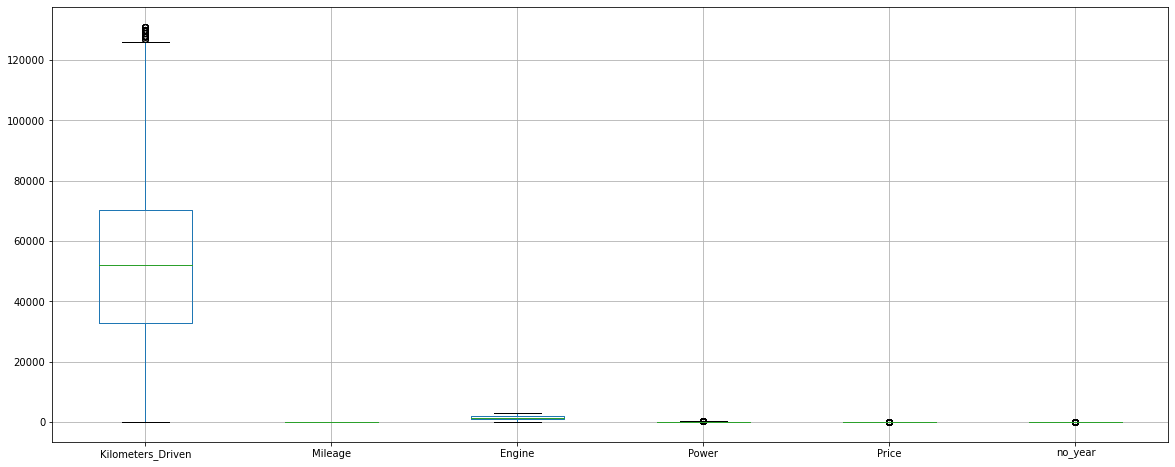

In [38]:
df7.boxplot(figsize=(20,8))

In [39]:
Q1 = df7.Power.quantile(0.25)
Q3 = df7.Power.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-15.000000000000014, 229.8)

In [40]:
df7[(df7.Power<lower_limit)|(df7.Power>upper_limit)]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
38,Mercedes-Benz M-Class ML 350 CDI,Pune,85000,Diesel,Automatic,First,11.74,2987.0,254.80,28.00,7
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,30000,Diesel,Automatic,First,14.94,2967.0,241.40,9.80,10
107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,78000,Diesel,Automatic,Second,14.74,2993.0,270.90,24.00,9
134,Mercedes-Benz SLC 43 AMG,Kolkata,13372,Petrol,Automatic,First,19.00,2996.0,362.07,54.00,3
148,Audi RS5 Coupe,Mumbai,23000,Petrol,Automatic,First,11.05,2894.0,444.00,37.00,7
...,...,...,...,...,...,...,...,...,...,...,...
5803,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,Chennai,100000,Diesel,Automatic,Second,11.30,2987.0,254.80,38.00,7
5868,BMW 3 Series 330d Convertible,Kochi,51240,Diesel,Automatic,First,8.20,2993.0,245.00,29.52,6
5927,Audi Q5 3.0 TDI Quattro Technology,Coimbatore,29091,Diesel,Automatic,First,13.22,2967.0,241.40,45.52,2
5946,BMW 5 Series 2013-2017 530d M Sport,Bangalore,16000,Diesel,Automatic,First,14.69,2993.0,258.00,48.00,4


In [41]:
df8= df7[(df7.Power>lower_limit)&(df7.Power<upper_limit)]
df8

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,7
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.40,1248.0,74.00,4.75,6
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.40,1120.0,71.00,4.00,5
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.00,2498.0,112.00,2.90,8
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.90,998.0,67.10,2.65,7


In [42]:
print('Before removing unwanted columns: {}'.format(df7.shape))
print('***********')
print('After removing unwanted columns: {}'.format(df8.shape))
 

Before removing unwanted columns: (5682, 11)
***********
After removing unwanted columns: (5489, 11)


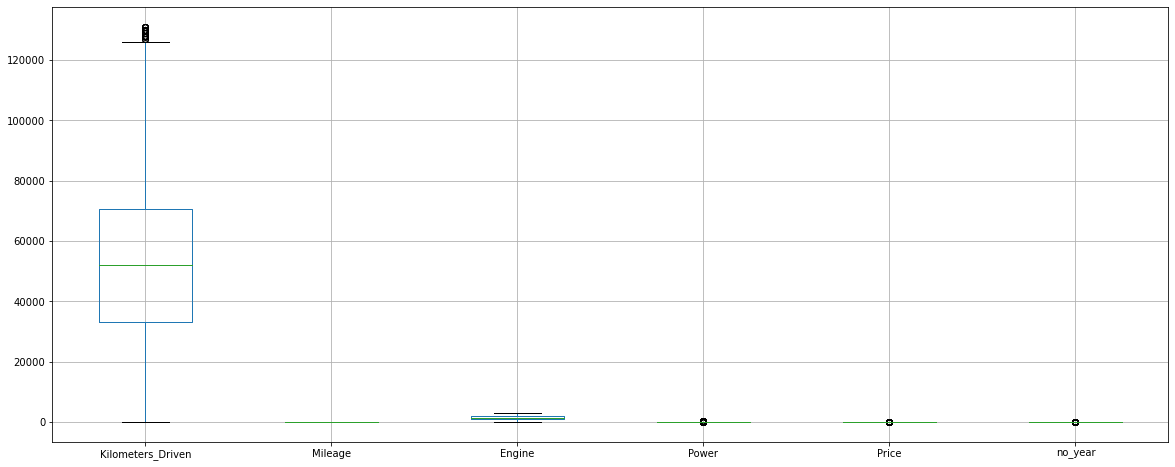

In [43]:
df8.boxplot(figsize=(20,8))

In [44]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5489 non-null   object 
 1   Location           5489 non-null   object 
 2   Kilometers_Driven  5489 non-null   int64  
 3   Fuel_Type          5489 non-null   object 
 4   Transmission       5489 non-null   object 
 5   Owner_Type         5489 non-null   object 
 6   Mileage            5489 non-null   float64
 7   Engine             5489 non-null   float64
 8   Power              5489 non-null   float64
 9   Price              5489 non-null   float64
 10  no_year            5489 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 514.6+ KB


In [45]:
Q1 = df8.Price.quantile(0.25)
Q3 = df8.Price.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-4.734999999999999, 17.225)

In [46]:
df8[(df8.Price<lower_limit)|(df8.Price>upper_limit)]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,7
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,36000,Diesel,Automatic,First,11.36,2755.0,171.50,17.50,4
13,Land Rover Range Rover 2.2L Pure,Delhi,72000,Diesel,Automatic,First,12.70,2179.0,187.70,27.00,6
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,78500,Diesel,Automatic,First,14.84,2143.0,167.62,28.00,6
20,BMW 3 Series 320d,Kochi,32982,Diesel,Automatic,First,22.69,1995.0,190.00,18.55,6
...,...,...,...,...,...,...,...,...,...,...,...
5954,Toyota Fortuner 4x4 AT,Chennai,95000,Diesel,Automatic,First,12.55,2982.0,168.50,19.60,5
5970,Mercedes-Benz GLA Class 200 Sport,Kochi,17773,Petrol,Automatic,First,13.70,1991.0,183.00,26.76,2
5996,Jaguar XF 2.2 Litre Luxury,Kochi,31150,Diesel,Automatic,First,16.36,2179.0,187.70,30.54,4
6001,Audi A6 2011-2015 2.0 TDI,Kochi,91903,Diesel,Automatic,First,17.68,1968.0,174.33,17.56,7


In [47]:
df9 = df8[(df8.Price>lower_limit)&(df8.Price<upper_limit)]
df9

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,5
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,9
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,8
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000,LPG,Manual,First,21.10,814.0,55.20,2.35,8
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.40,1248.0,74.00,4.75,6
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.40,1120.0,71.00,4.00,5
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.00,2498.0,112.00,2.90,8
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.90,998.0,67.10,2.65,7


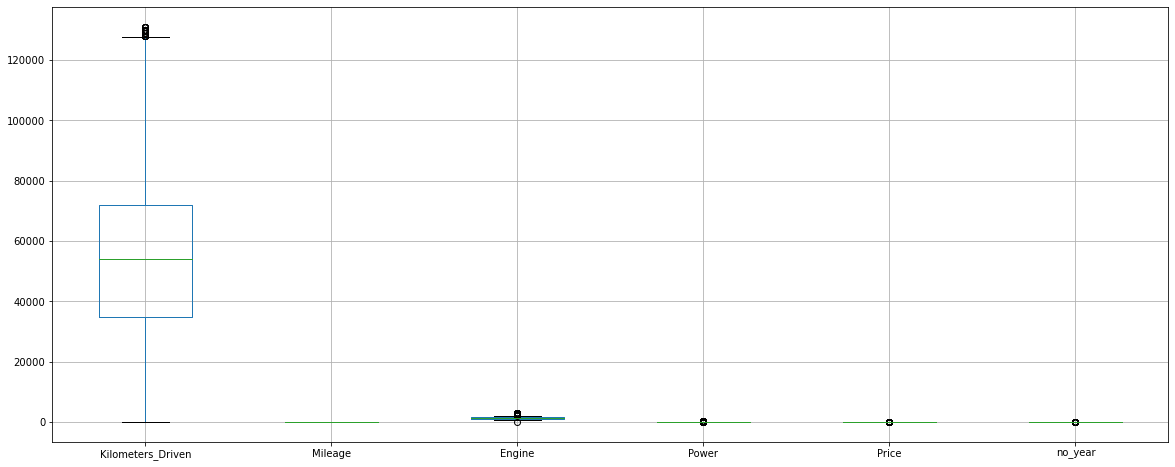

In [48]:
df9.boxplot(figsize=(20,8))

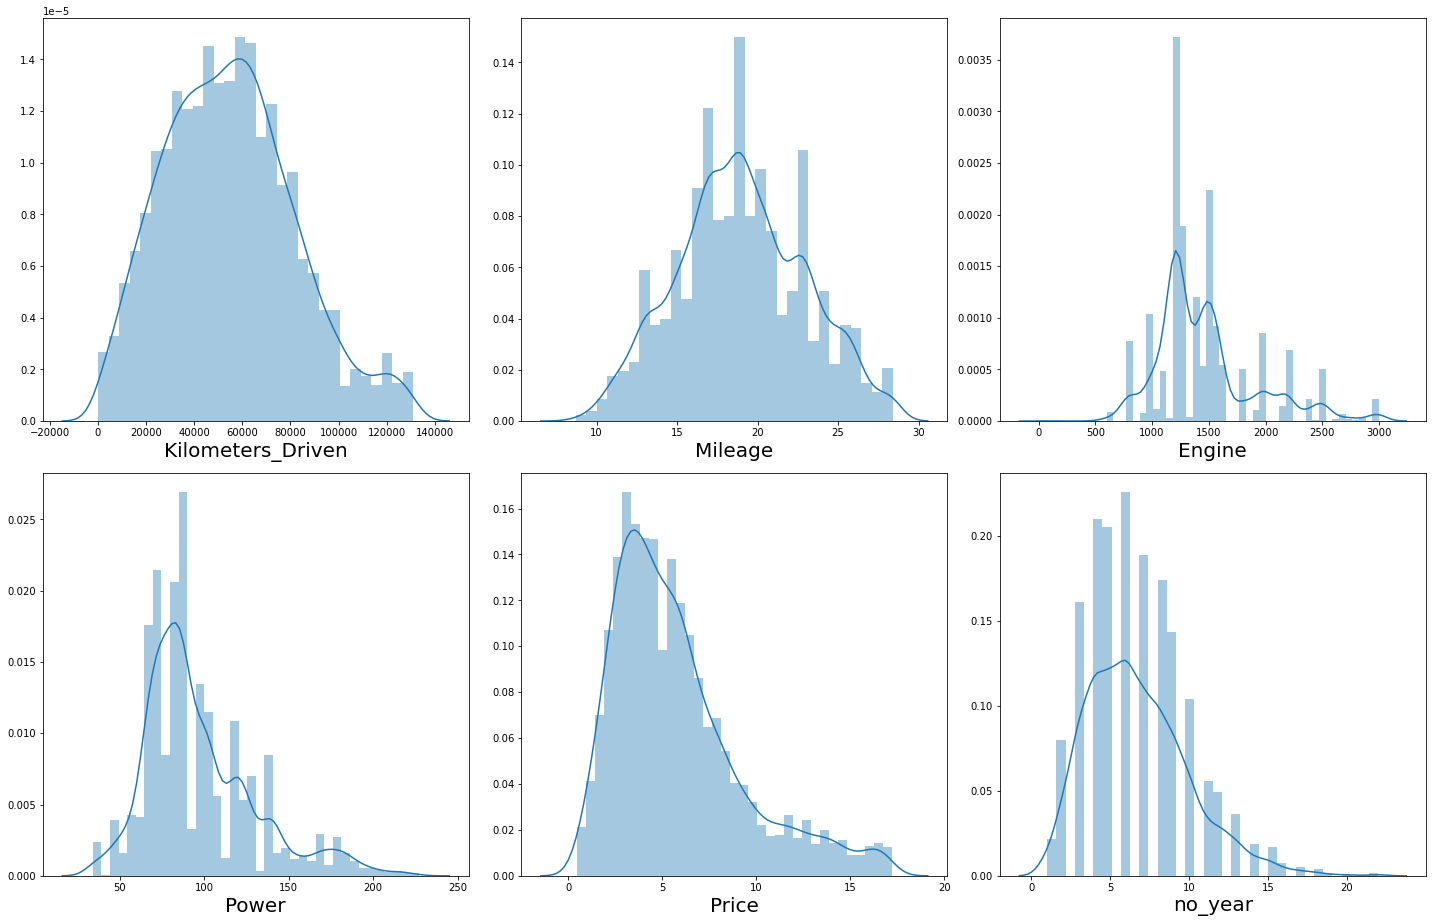

In [49]:
# let's see Finnaly how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df9.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df9[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout() 

In [50]:
print('***********')
print('After removing unwanted columns: {}'.format(df9.shape))

***********
After removing unwanted columns: (4877, 11)


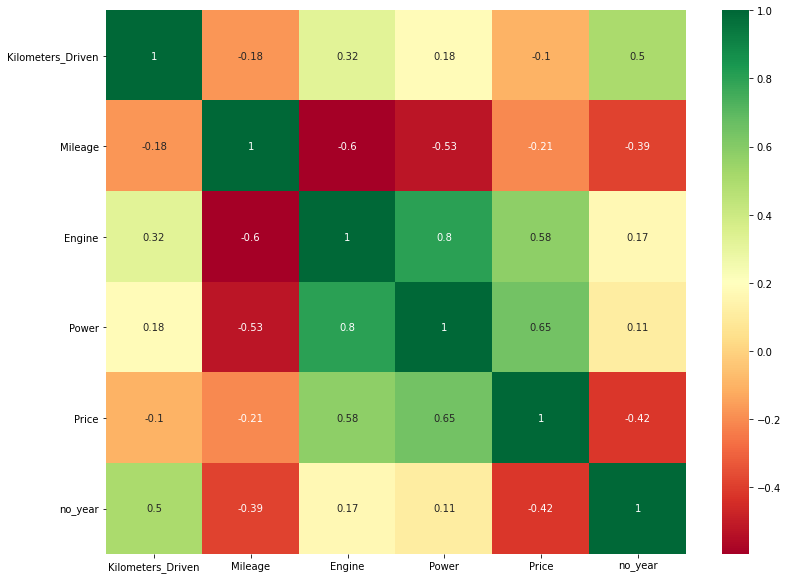

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df9.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df9[top_corr_features].corr(), annot=True, cmap='RdYlGn')

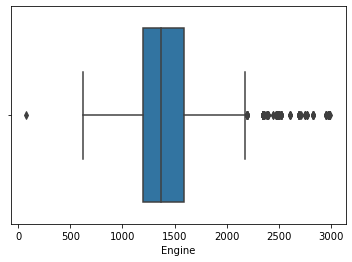

In [52]:
 sns.boxplot('Engine',data=df9)  

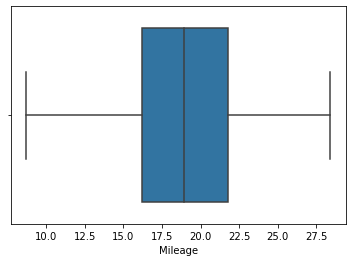

In [53]:
 sns.boxplot('Mileage',data=df9) 

# Categorical Values Handling

In [54]:
df9.columns

Index(['Name', 'Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Price', 'no_year'],
      dtype='object')

In [55]:
df9['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [56]:
 fuel_stats = df9['Fuel_Type'].value_counts(ascending=False)
fuel_stats

Petrol      2560
Diesel      2263
CNG           42
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [57]:
 Fuel_less_than_10 = fuel_stats[fuel_stats<=10]
Fuel_less_than_10

LPG         10
Electric     2
Name: Fuel_Type, dtype: int64

In [58]:
 df9.Fuel_Type = df9.Fuel_Type.apply(lambda x: 'other' if x in Fuel_less_than_10 else x)
 

C:\Users\acer\Anaconda\envs\ram\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
 dummies = pd.get_dummies(df9.Fuel_Type)
dummies.head(3)

,CNG,Diesel,Petrol,other
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0


In [60]:
df10 = pd.concat([df9,dummies.drop(['other'],axis='columns')],axis='columns')
df10.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,10,1,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,5,0,1,0
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,9,0,0,1
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,8,0,1,0
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000,other,Manual,First,21.10,814.0,55.20,2.35,8,0,0,0


In [61]:
df10= df10.drop(['Fuel_Type'],axis='columns')
df10

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol
0,Maruti Wagon R LXI CNG,Mumbai,72000,Manual,First,26.60,998.0,58.16,1.75,10,1,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Manual,First,19.67,1582.0,126.20,12.50,5,0,1,0
2,Honda Jazz V,Chennai,46000,Manual,First,18.20,1199.0,88.70,4.50,9,0,0,1
3,Maruti Ertiga VDI,Chennai,87000,Manual,First,20.77,1248.0,88.76,6.00,8,0,1,0
5,Hyundai EON LPG Era Plus Option,Hyderabad,75000,Manual,First,21.10,814.0,55.20,2.35,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Manual,First,28.40,1248.0,74.00,4.75,6,0,1,0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Manual,First,24.40,1120.0,71.00,4.00,5,0,1,0
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Manual,Second,14.00,2498.0,112.00,2.90,8,0,1,0
6017,Maruti Wagon R VXI,Kolkata,46000,Manual,First,18.90,998.0,67.10,2.65,7,0,0,1


In [62]:
df10.shape

(4877, 13)

In [63]:
df10['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [64]:
name_stats = df10['Name'].value_counts(ascending=False)
name_stats

Mahindra XUV500 W8 2WD                         48
Maruti Swift VDI                               44
Maruti Swift Dzire VDI                         33
Honda City 1.5 S MT                            33
Maruti Swift VDI BSIV                          31
                                               ..
Ford EcoSport 1.0 Ecoboost Titanium Plus BE     1
Nissan Sunny XL CVT                             1
Toyota Corolla Altis Aero D 4D J                1
Chevrolet Tavera LS B3 10 Seats BSIII           1
Mini Cooper S                                   1
Name: Name, Length: 1526, dtype: int64

In [65]:
name_stats_less_than_30 = name_stats[name_stats<=30]
name_stats_less_than_30

Hyundai i10 Sportz                             30
Maruti Ritz VDi                                29
Hyundai Grand i10 Sportz                       27
Honda Amaze S i-Dtech                          27
Honda Brio S MT                                25
                                               ..
Ford EcoSport 1.0 Ecoboost Titanium Plus BE     1
Nissan Sunny XL CVT                             1
Toyota Corolla Altis Aero D 4D J                1
Chevrolet Tavera LS B3 10 Seats BSIII           1
Mini Cooper S                                   1
Name: Name, Length: 1521, dtype: int64

In [66]:
df10.Name = df10.Name.apply(lambda x: 'others' if x in name_stats_less_than_30 else x)


In [67]:
df10.columns

Index(['Name', 'Location', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Price', 'no_year', 'CNG', 'Diesel',
       'Petrol'],
      dtype='object')

In [68]:
df10['Name'].value_counts(ascending=False)

others                    4688
Mahindra XUV500 W8 2WD      48
Maruti Swift VDI            44
Maruti Swift Dzire VDI      33
Honda City 1.5 S MT         33
Maruti Swift VDI BSIV       31
Name: Name, dtype: int64

In [69]:
dummies = pd.get_dummies(df10.Name)
dummies.head()


,Honda City 1.5 S MT,Mahindra XUV500 W8 2WD,Maruti Swift Dzire VDI,Maruti Swift VDI,Maruti Swift VDI BSIV,others
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
5,0,0,0,0,0,1


In [70]:
df11 = pd.concat([df10,dummies.drop(['others'],axis='columns')],axis='columns')
df11.head()

,Name,Location,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol,Honda City 1.5 S MT,Mahindra XUV500 W8 2WD,Maruti Swift Dzire VDI,Maruti Swift VDI,Maruti Swift VDI BSIV
0,others,Mumbai,72000,Manual,First,26.60,998.0,58.16,1.75,10,1,0,0,0,0,0,0,0
1,others,Pune,41000,Manual,First,19.67,1582.0,126.20,12.50,5,0,1,0,0,0,0,0,0
2,others,Chennai,46000,Manual,First,18.20,1199.0,88.70,4.50,9,0,0,1,0,0,0,0,0
3,others,Chennai,87000,Manual,First,20.77,1248.0,88.76,6.00,8,0,1,0,0,0,0,0,0
5,others,Hyderabad,75000,Manual,First,21.10,814.0,55.20,2.35,8,0,0,0,0,0,0,0,0


In [71]:
df11= df11.drop(['Name'],axis='columns')
df11

,Location,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol,Honda City 1.5 S MT,Mahindra XUV500 W8 2WD,Maruti Swift Dzire VDI,Maruti Swift VDI,Maruti Swift VDI BSIV
0,Mumbai,72000,Manual,First,26.60,998.0,58.16,1.75,10,1,0,0,0,0,0,0,0
1,Pune,41000,Manual,First,19.67,1582.0,126.20,12.50,5,0,1,0,0,0,0,0,0
2,Chennai,46000,Manual,First,18.20,1199.0,88.70,4.50,9,0,0,1,0,0,0,0,0
3,Chennai,87000,Manual,First,20.77,1248.0,88.76,6.00,8,0,1,0,0,0,0,0,0
5,Hyderabad,75000,Manual,First,21.10,814.0,55.20,2.35,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,Manual,First,28.40,1248.0,74.00,4.75,6,0,1,0,0,0,0,1,0
6015,Jaipur,100000,Manual,First,24.40,1120.0,71.00,4.00,5,0,1,0,0,0,0,0,0
6016,Jaipur,55000,Manual,Second,14.00,2498.0,112.00,2.90,8,0,1,0,0,0,0,0,0
6017,Kolkata,46000,Manual,First,18.90,998.0,67.10,2.65,7,0,0,1,0,0,0,0,0


# For Categorical Feature =>Location

In [72]:
df11['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Hyderabad', 'Jaipur', 'Kochi',
       'Kolkata', 'Delhi', 'Bangalore', 'Coimbatore', 'Ahmedabad'],
      dtype=object)

In [73]:
location_stats = df11['Location'].value_counts(ascending=False)
location_stats

Mumbai        657
Hyderabad     574
Kochi         524
Pune          515
Kolkata       498
Delhi         464
Coimbatore    459
Chennai       390
Jaipur        362
Bangalore     242
Ahmedabad     192
Name: Location, dtype: int64

In [74]:
location_stats_less_than_10 = location_stats[location_stats<=400]
location_stats_less_than_10

Chennai      390
Jaipur       362
Bangalore    242
Ahmedabad    192
Name: Location, dtype: int64

In [75]:

df11.Location = df11.Location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
 

In [76]:
dummies = pd.get_dummies(df11.Location)
dummies.head()

,Coimbatore,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune,others
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0


In [77]:
df11['Location'].value_counts()

others        1186
Mumbai         657
Hyderabad      574
Kochi          524
Pune           515
Kolkata        498
Delhi          464
Coimbatore     459
Name: Location, dtype: int64

In [78]:
df12 = pd.concat([df11,dummies.drop(['others'],axis='columns')],axis='columns')
df12.head()

,Location,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,...,Maruti Swift Dzire VDI,Maruti Swift VDI,Maruti Swift VDI BSIV,Coimbatore,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune
0,Mumbai,72000,Manual,First,26.60,998.0,58.16,1.75,10,1,...,0,0,0,0,0,0,0,0,1,0
1,Pune,41000,Manual,First,19.67,1582.0,126.20,12.50,5,0,...,0,0,0,0,0,0,0,0,0,1
2,others,46000,Manual,First,18.20,1199.0,88.70,4.50,9,0,...,0,0,0,0,0,0,0,0,0,0
3,others,87000,Manual,First,20.77,1248.0,88.76,6.00,8,0,...,0,0,0,0,0,0,0,0,0,0
5,Hyderabad,75000,Manual,First,21.10,814.0,55.20,2.35,8,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
df12= df12.drop(['Location'],axis='columns')
df12

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,Diesel,...,Maruti Swift Dzire VDI,Maruti Swift VDI,Maruti Swift VDI BSIV,Coimbatore,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune
0,72000,Manual,First,26.60,998.0,58.16,1.75,10,1,0,...,0,0,0,0,0,0,0,0,1,0
1,41000,Manual,First,19.67,1582.0,126.20,12.50,5,0,1,...,0,0,0,0,0,0,0,0,0,1
2,46000,Manual,First,18.20,1199.0,88.70,4.50,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,Manual,First,20.77,1248.0,88.76,6.00,8,0,1,...,0,0,0,0,0,0,0,0,0,0
5,75000,Manual,First,21.10,814.0,55.20,2.35,8,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,Manual,First,28.40,1248.0,74.00,4.75,6,0,1,...,0,1,0,0,1,0,0,0,0,0
6015,100000,Manual,First,24.40,1120.0,71.00,4.00,5,0,1,...,0,0,0,0,0,0,0,0,0,0
6016,55000,Manual,Second,14.00,2498.0,112.00,2.90,8,0,1,...,0,0,0,0,0,0,0,0,0,0
6017,46000,Manual,First,18.90,998.0,67.10,2.65,7,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
 df12['Owner_Type'].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [81]:
df12['Owner_Type'].value_counts()

First             4006
Second             773
Third               92
Fourth & Above       6
Name: Owner_Type, dtype: int64

In [82]:
owner_stats = df12['Owner_Type'].value_counts(ascending=False)
owner_stats

First             4006
Second             773
Third               92
Fourth & Above       6
Name: Owner_Type, dtype: int64

In [83]:
owner_stats_less_than_10 = owner_stats[owner_stats<=100]
owner_stats_less_than_10

Third             92
Fourth & Above     6
Name: Owner_Type, dtype: int64

In [84]:

df12.Owner_Type = df12.Owner_Type.apply(lambda x: 'others' if x in owner_stats_less_than_10 else x)
 

In [85]:
dummies = pd.get_dummies(df12.Owner_Type)
dummies.head()

,First,Second,others
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
5,1,0,0


In [86]:
df13= pd.concat([df12,dummies.drop(['others'],axis='columns')],axis='columns')
df13.head()

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,no_year,CNG,Diesel,...,Maruti Swift VDI BSIV,Coimbatore,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune,First,Second
0,72000,Manual,First,26.60,998.0,58.16,1.75,10,1,0,...,0,0,0,0,0,0,1,0,1,0
1,41000,Manual,First,19.67,1582.0,126.20,12.50,5,0,1,...,0,0,0,0,0,0,0,1,1,0
2,46000,Manual,First,18.20,1199.0,88.70,4.50,9,0,0,...,0,0,0,0,0,0,0,0,1,0
3,87000,Manual,First,20.77,1248.0,88.76,6.00,8,0,1,...,0,0,0,0,0,0,0,0,1,0
5,75000,Manual,First,21.10,814.0,55.20,2.35,8,0,0,...,0,0,0,1,0,0,0,0,1,0


In [87]:
df13= df13.drop(['Owner_Type'],axis='columns')
df13

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol,...,Maruti Swift VDI BSIV,Coimbatore,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune,First,Second
0,72000,Manual,26.60,998.0,58.16,1.75,10,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,41000,Manual,19.67,1582.0,126.20,12.50,5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,46000,Manual,18.20,1199.0,88.70,4.50,9,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,87000,Manual,20.77,1248.0,88.76,6.00,8,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,75000,Manual,21.10,814.0,55.20,2.35,8,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,Manual,28.40,1248.0,74.00,4.75,6,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6015,100000,Manual,24.40,1120.0,71.00,4.00,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6016,55000,Manual,14.00,2498.0,112.00,2.90,8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6017,46000,Manual,18.90,998.0,67.10,2.65,7,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [88]:
dummies = pd.get_dummies(df13.Transmission)
dummies.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
5,0,1


In [89]:
df14 = pd.concat([df13,dummies],axis='columns')
df14.head()

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol,...,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune,First,Second,Automatic,Manual
0,72000,Manual,26.60,998.0,58.16,1.75,10,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,41000,Manual,19.67,1582.0,126.20,12.50,5,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,46000,Manual,18.20,1199.0,88.70,4.50,9,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,87000,Manual,20.77,1248.0,88.76,6.00,8,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,75000,Manual,21.10,814.0,55.20,2.35,8,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [90]:
df14= df14.drop(['Transmission'],axis='columns')
df14

,Kilometers_Driven,Mileage,Engine,Power,Price,no_year,CNG,Diesel,Petrol,Honda City 1.5 S MT,...,Delhi,Hyderabad,Kochi,Kolkata,Mumbai,Pune,First,Second,Automatic,Manual
0,72000,26.60,998.0,58.16,1.75,10,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,41000,19.67,1582.0,126.20,12.50,5,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2,46000,18.20,1199.0,88.70,4.50,9,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,87000,20.77,1248.0,88.76,6.00,8,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,75000,21.10,814.0,55.20,2.35,8,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,28.40,1248.0,74.00,4.75,6,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
6015,100000,24.40,1120.0,71.00,4.00,5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
6016,55000,14.00,2498.0,112.00,2.90,8,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
6017,46000,18.90,998.0,67.10,2.65,7,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [91]:
df14.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'no_year',
       'CNG', 'Diesel', 'Petrol', 'Honda City 1.5 S MT',
       'Mahindra XUV500 W8 2WD', 'Maruti Swift Dzire VDI', 'Maruti Swift VDI',
       'Maruti Swift VDI BSIV', 'Coimbatore', 'Delhi', 'Hyderabad', 'Kochi',
       'Kolkata', 'Mumbai', 'Pune', 'First', 'Second', 'Automatic', 'Manual'],
      dtype='object')

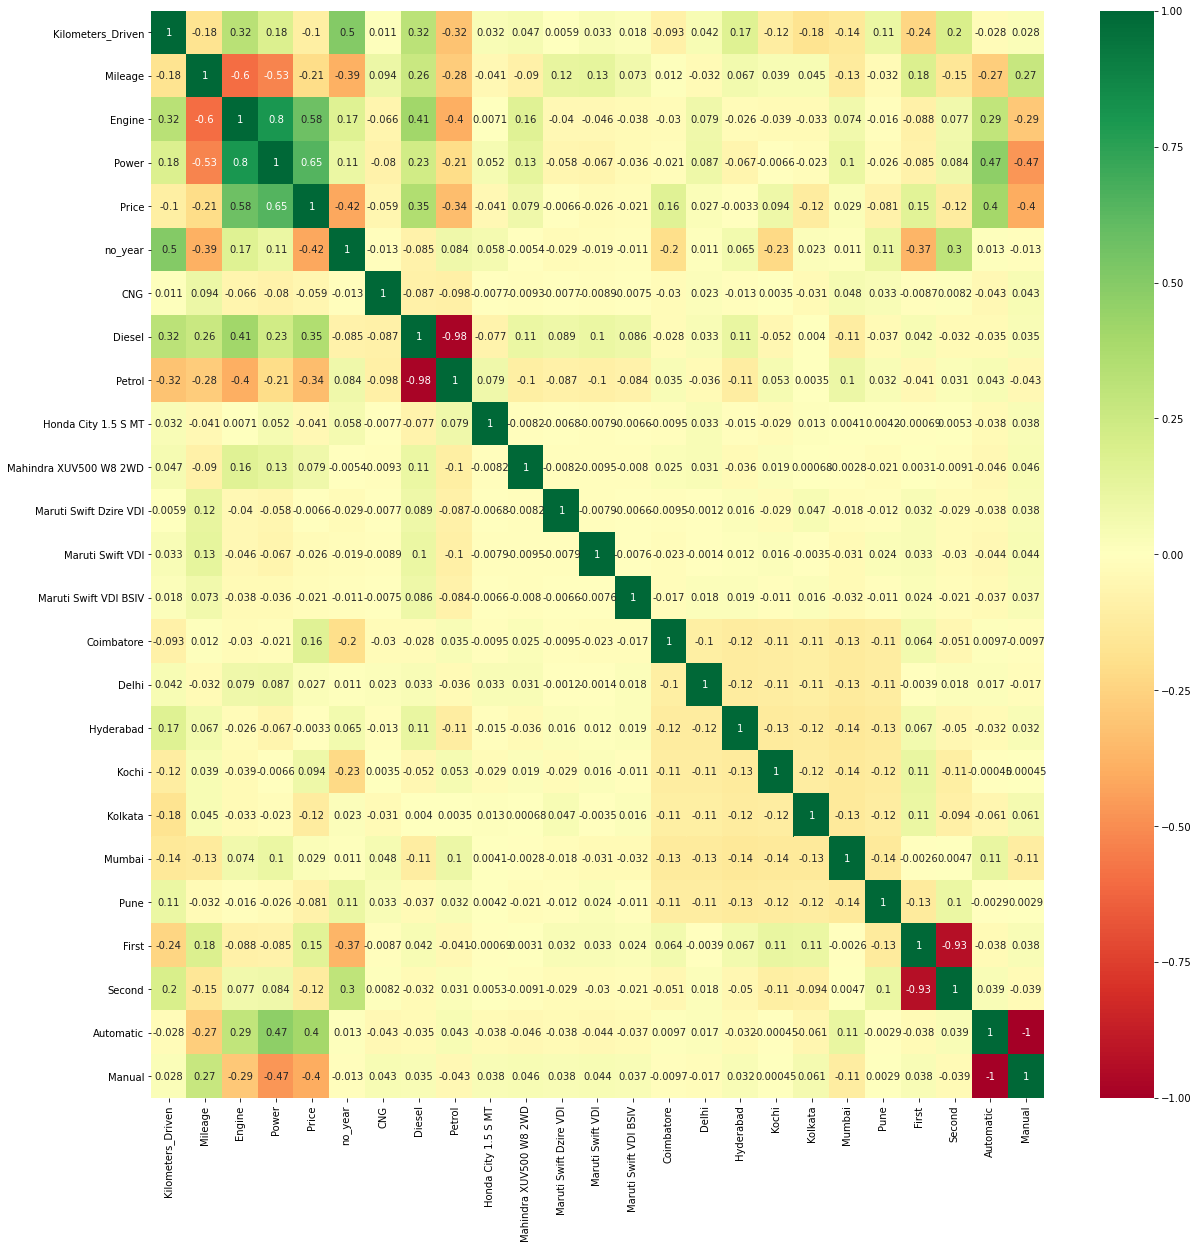

In [92]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df14.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df14[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [93]:
df15=df14.copy()

In [94]:
# Rearranging the columns
df15= df15[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','no_year', 'CNG', 'Diesel', 'Petrol', 'Honda City 1.5 S MT',
       'Mahindra XUV500 W8 2WD', 'Maruti Swift Dzire VDI', 'Maruti Swift VDI',
       'Maruti Swift VDI BSIV', 'Coimbatore', 'Delhi', 'Hyderabad', 'Kochi',
       'Kolkata', 'Mumbai', 'Pune', 'First', 'Second', 'Automatic', 'Manual','Price']]

In [95]:
df15=df15.rename(columns = {'Honda City 1.5 S MT':'Honda City','Mahindra XUV500 W8 2WD':'Mahindra XUV500'})


In [96]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4877 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kilometers_Driven       4877 non-null   int64  
 1   Mileage                 4877 non-null   float64
 2   Engine                  4877 non-null   float64
 3   Power                   4877 non-null   float64
 4   no_year                 4877 non-null   int64  
 5   CNG                     4877 non-null   uint8  
 6   Diesel                  4877 non-null   uint8  
 7   Petrol                  4877 non-null   uint8  
 8   Honda City              4877 non-null   uint8  
 9   Mahindra XUV500         4877 non-null   uint8  
 10  Maruti Swift Dzire VDI  4877 non-null   uint8  
 11  Maruti Swift VDI        4877 non-null   uint8  
 12  Maruti Swift VDI BSIV   4877 non-null   uint8  
 13  Coimbatore              4877 non-null   uint8  
 14  Delhi                   4877 non-null   

In [ ]:
df15.shape

In [97]:
X= df15.drop("Price", axis = 1) #independent variables
y = df15["Price"] #target feature

## Model Buidling

In [98]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [100]:
#Random Forest Regressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [101]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [102]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [103]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [104]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [105]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [106]:

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [107]:
rf_random.best_score_

-1.7869845297017701

In [108]:
predictions=rf_random.predict(X_test)

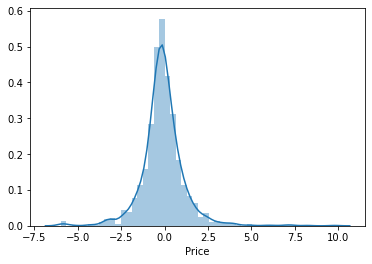

In [109]:

sns.distplot(y_test-predictions)

In [110]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8182957029946565
MSE: 1.5807922537528956
RMSE: 1.2572956111244864


In [111]:
import pickle
# open a file, where you ant to store the data
file = open('new_random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

# Gradient Boost

In [112]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [113]:
y_pred = model.predict(X_test)
 

In [114]:
model.score(X_train, y_train)


0.8821252978676393

In [115]:
model.score(X_test, y_test)

0.8223709605161675

In [116]:
#Metrics for evaluating parameters
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9076359078281163
MSE: 1.894181225622977
RMSE: 1.376292565417316


In [117]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y.ravel(),cv=10)


score


array([0.84246042, 0.84532405, 0.80812756, 0.85275946, 0.85532641,
       0.82117688, 0.84854026, 0.83504292, 0.85197905, 0.85250556])

In [118]:
score.mean()

0.8413242556726777

In [119]:
import pickle
# open a file, where you ant to store the data
file = open('new_gradient_boost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [120]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("new_columns.json","w") as f:
    f.write(json.dumps(columns))